In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-5, 5, 1000)

In [3]:
def gauss(x, mu=0.0, sig=1.0):
    # Not normalizing the peak
    # fp = 1 / np.sqrt(2 * np.pi * sig * sig)
    fp = 1
    num = -(x - mu) ** 2
    den = 2 * sig * sig
    sp = np.exp(num / den)
    return fp * sp

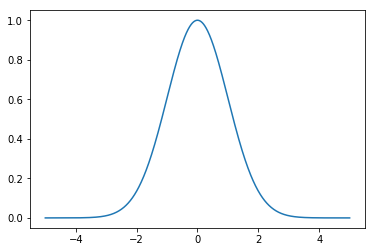

In [4]:
plt.plot(x, gauss(x))

In [5]:
def error(yt, yp):
    return 0.5 * (yt - yp) ** 2

In [6]:
yt = gauss(x)

In [7]:
class Neuron():
    def __init__(self):
        self._sigma = np.random.rand()
        self._lr = 0.01
        self._mu = 0.0
        
    def predict(self, x):
        return np.exp(-(x-self._mu)**2 / (2 * self._sigma ** 2))
    
    def fit(self, x, y):
        yp = self.predict(x)
        
        self._sigma -= self._lr * (y - yp) * yp * x * (self._sigma ** -3)

# Animation!

In [8]:
from matplotlib import animation, rc
from IPython.display import HTML

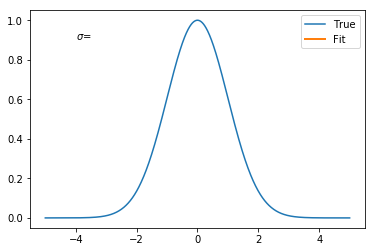

In [9]:
fig, ax = plt.subplots()

ax.plot(x, yt, label='True')

txt = plt.text(x=-4, y=0.9, s=f'$\sigma$=')

line, = ax.plot([], [], lw=2, label='Fit')

ax.legend(loc='best')

In [10]:
n2 = Neuron()
n2._sigma = 0.2

In [11]:
def init():
    n2._sigma = 0.2
    line.set_data([], [])
    txt.set_text(f'$\sigma$={n2._sigma:0.2f}')
    return (line, txt)

In [12]:
def animate(i):
    for xi, yi in zip(x, yt):
        n2.fit(xi, yi)
    yp = n2.predict(x)
    line.set_data(x, yp)
    txt.set_text(f'$\sigma$={n2._sigma:0.2f}')
    return (line, txt)

In [13]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)
anim.save('gaussian_peak_fitting.m4v')

In [14]:
HTML(anim.to_html5_video())

In [15]:
n2._sigma

0.9535259382483675